<a href="https://colab.research.google.com/github/dikshasingh001/codesoft3task/blob/main/Copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape


(150, 5)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

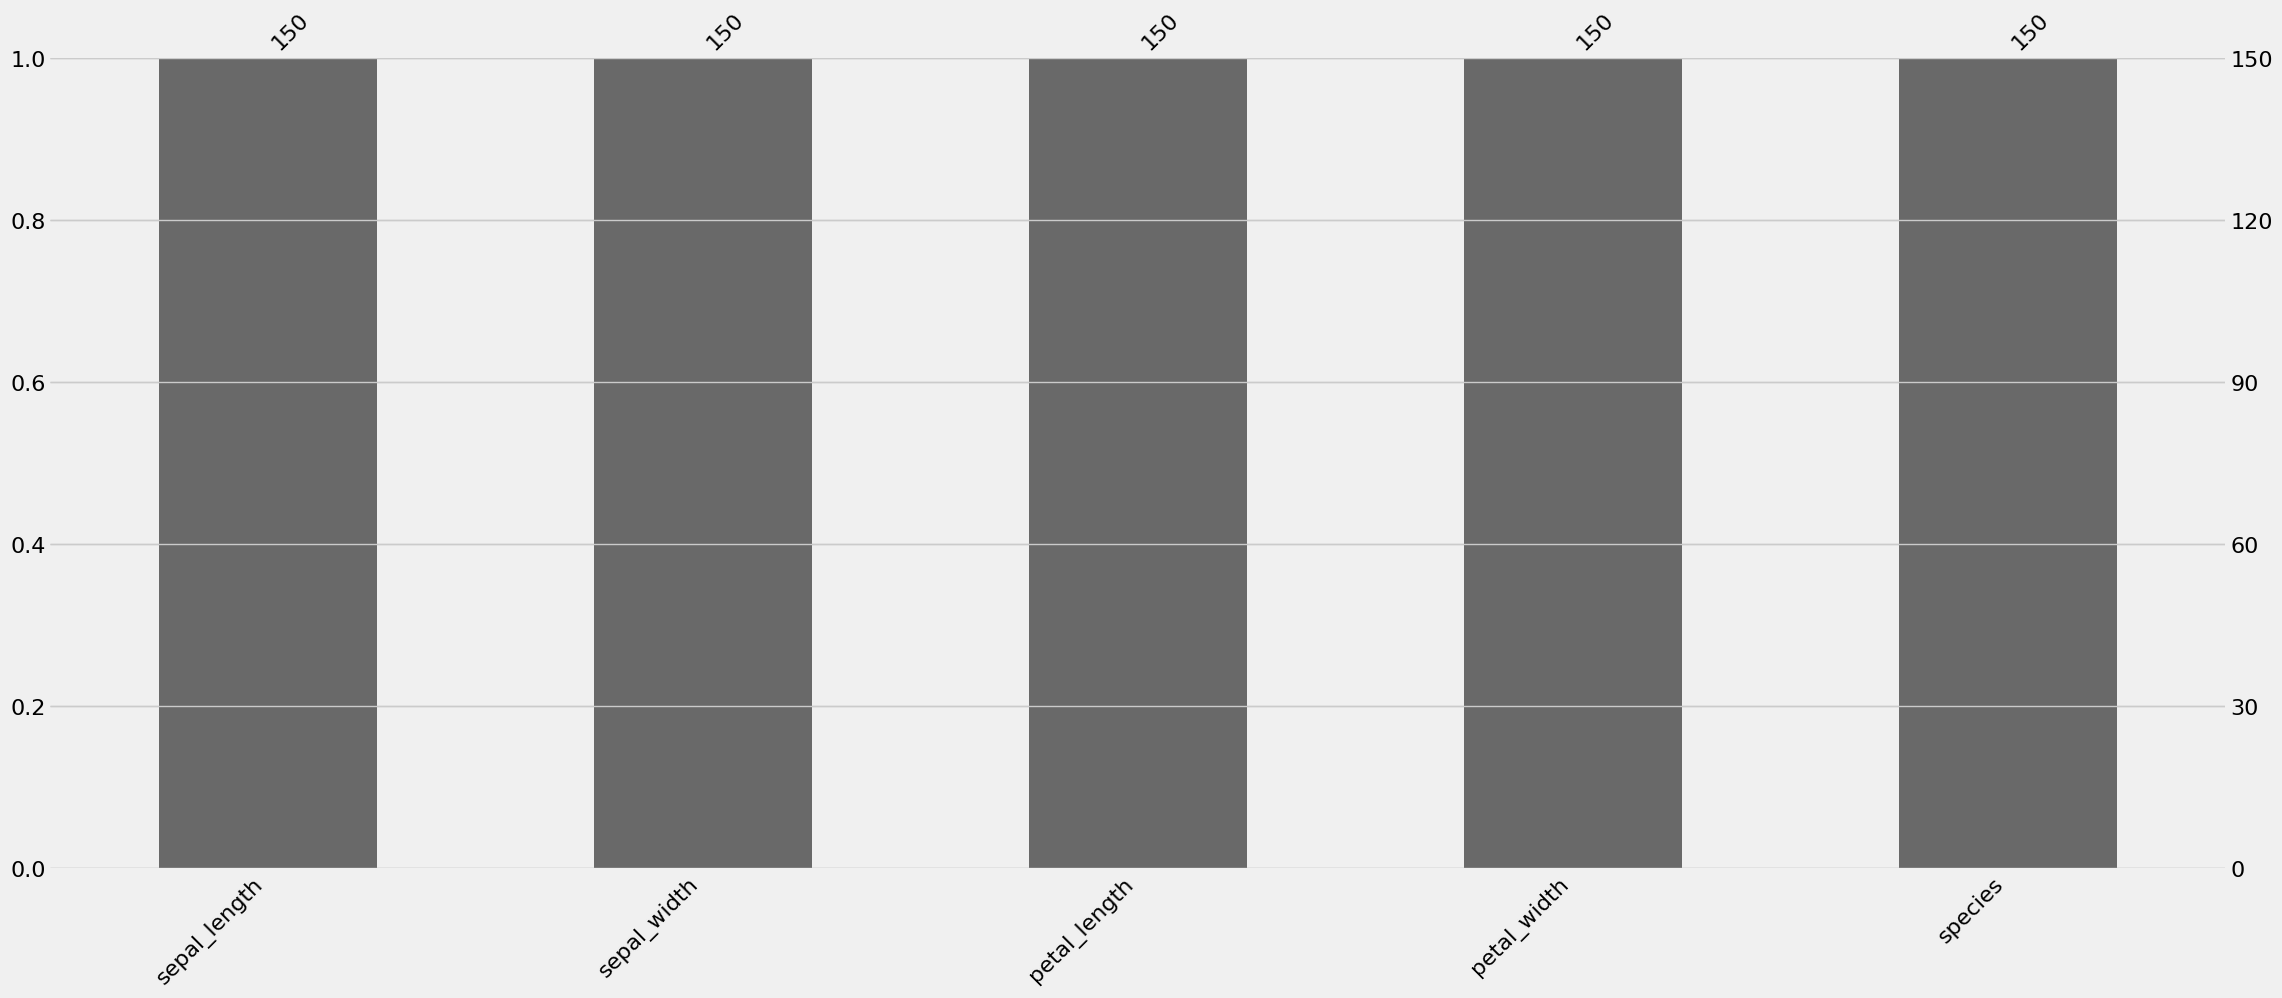

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.drop_duplicates(inplace=True)


<Axes: xlabel='species', ylabel='sepal_length'>

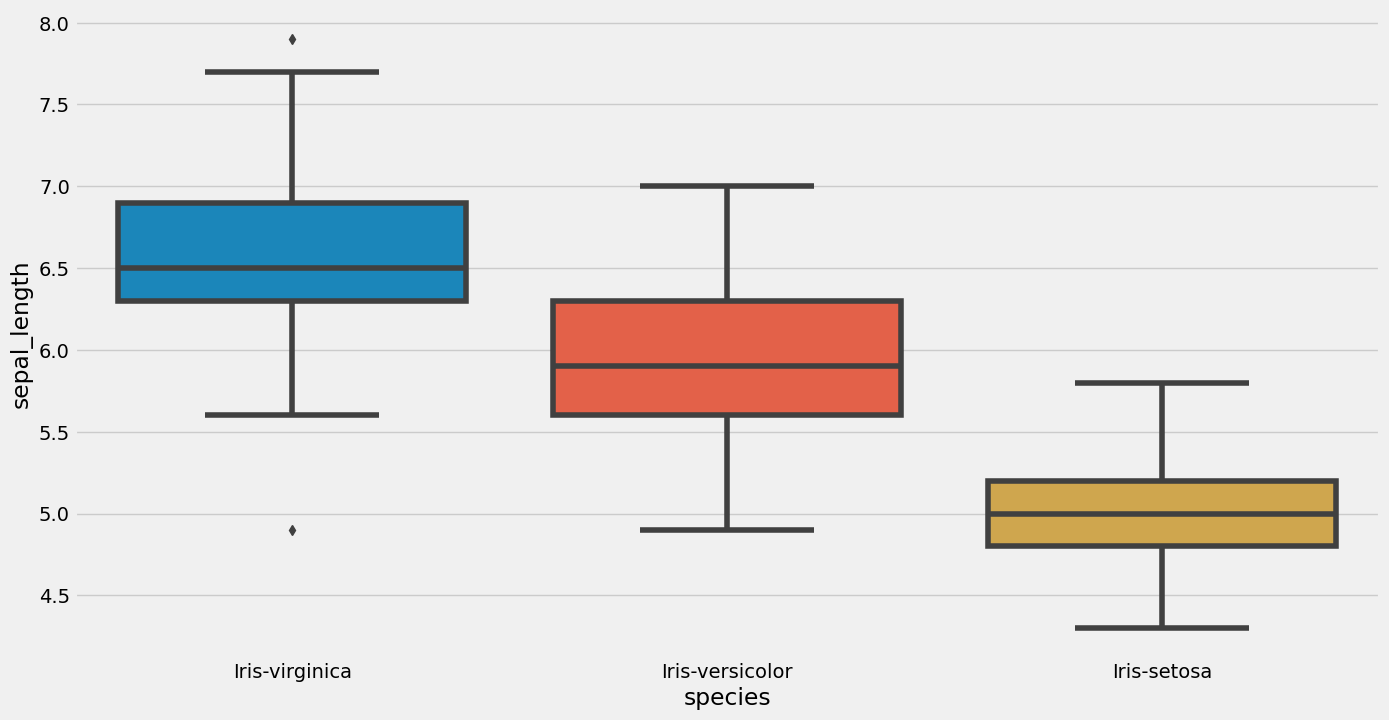

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=df.sort_values('sepal_length',ascending=False))


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

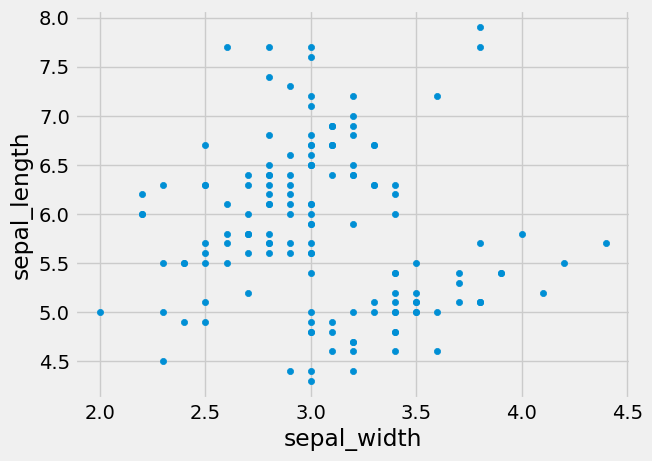

In [ ]:
df.plot(kind='scatter',x='sepal_width',y='sepal_length')

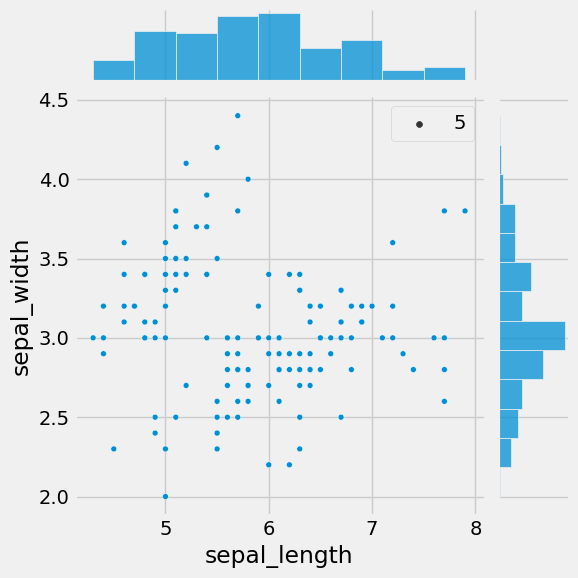

In [ ]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)


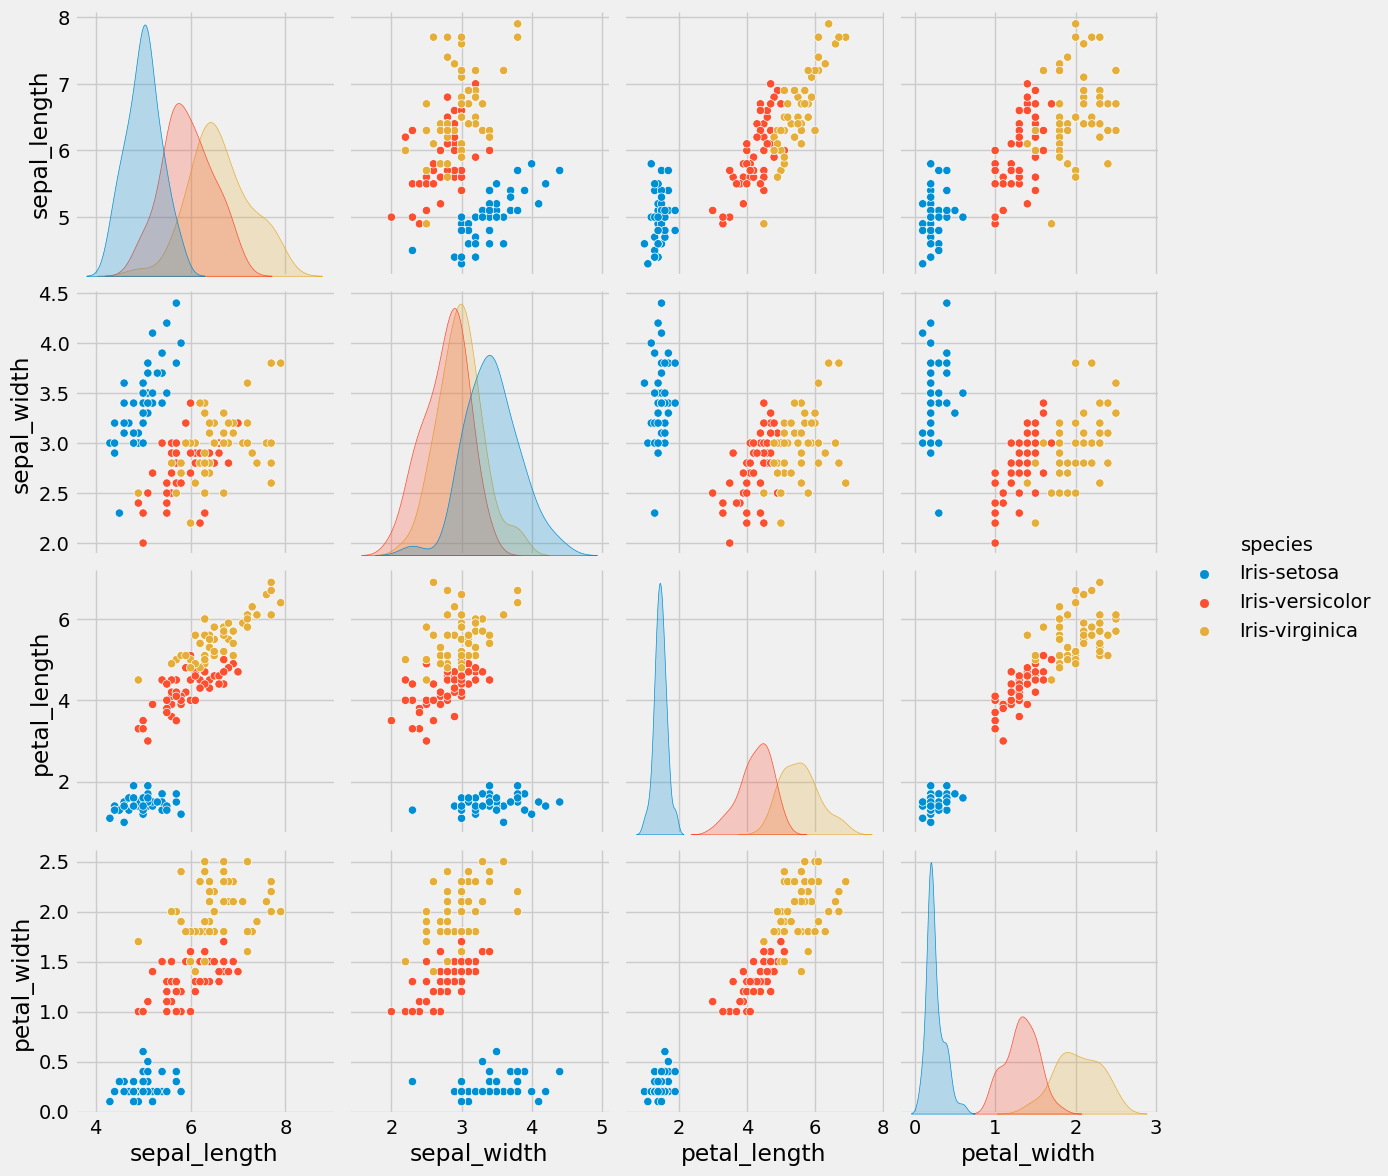

In [ ]:
sns.pairplot(df, hue="species", size=3)


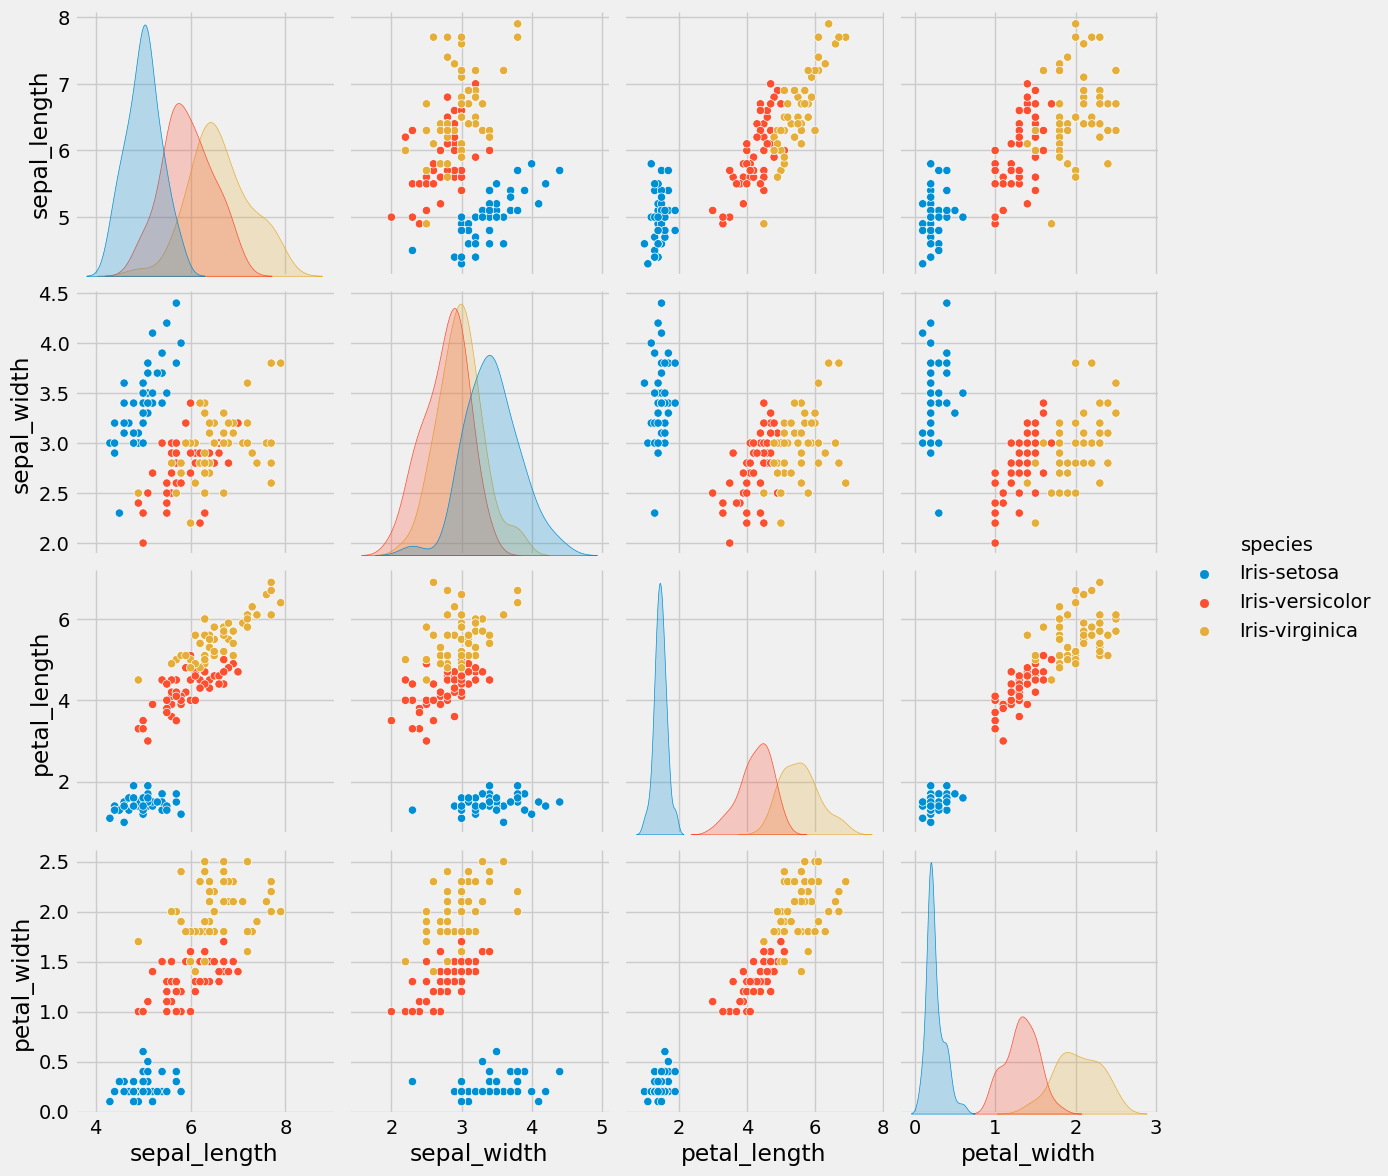

In [ ]:
sns.pairplot(df, hue="species", size=3)


array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

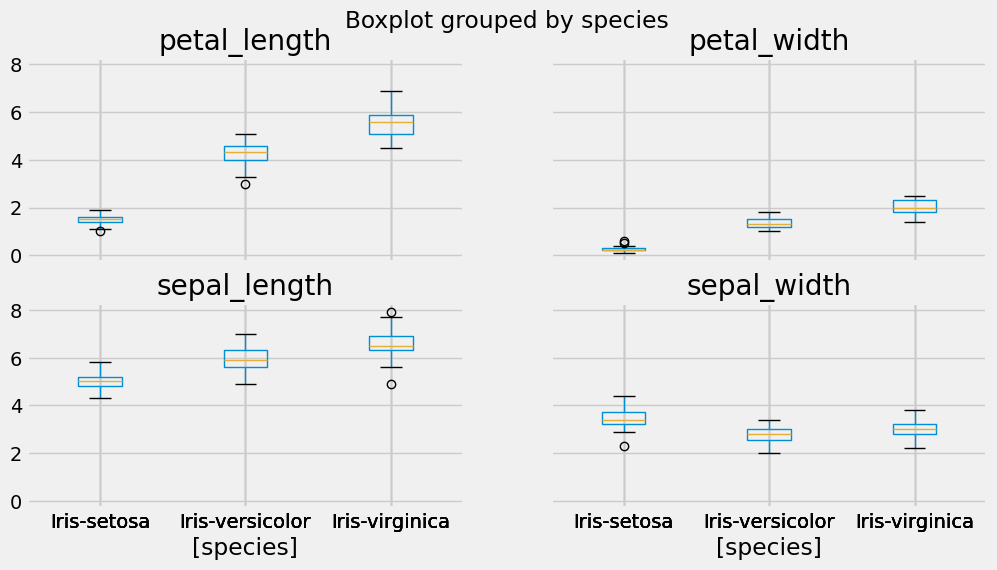

In [ ]:
df.boxplot(by="species", figsize=(12, 6))

<Axes: >

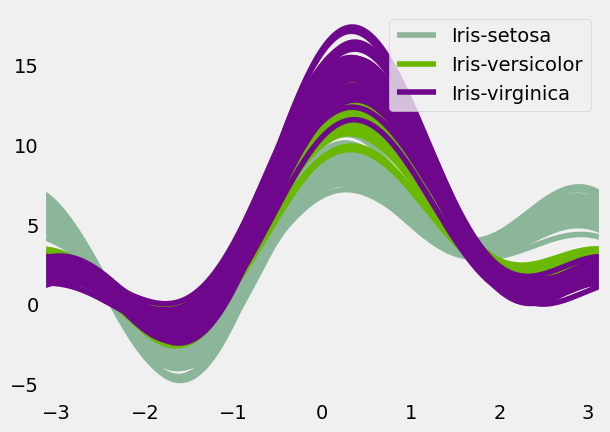

In [ ]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species")

<Figure size 1500x1500 with 0 Axes>

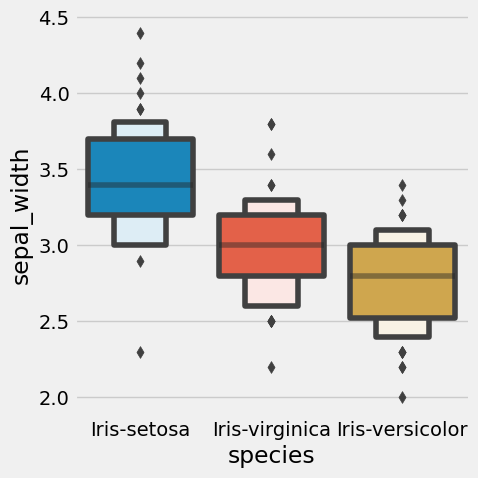

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

<Axes: xlabel='species', ylabel='sepal_width'>

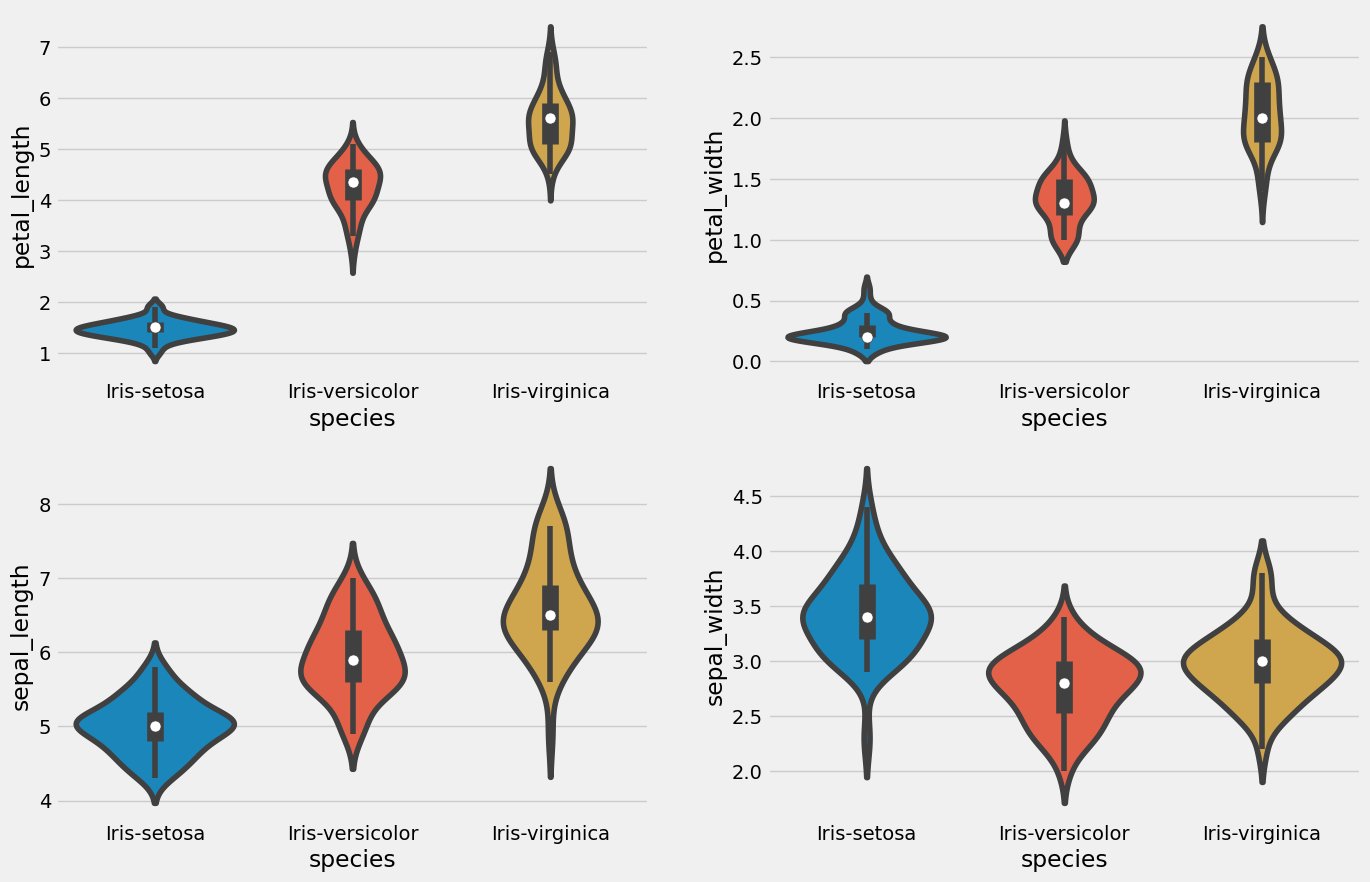

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)


In [ ]:
X=df.drop('species',axis=1)
y=df['species']


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [ ]:
df['species'] = pd.Categorical(df.species)
df['species'] = df.species.cat.codes

y = to_categorical(df.species)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)


In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))


Epoch 1/45
4/4 [==============================] - 1s 92ms/step - loss: 1.3231 - accuracy: 0.3235 - val_loss: 1.1927 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 15ms/step - loss: 1.1679 - accuracy: 0.3725 - val_loss: 1.0803 - val_accuracy: 0.6444
Epoch 3/45
4/4 [==============================] - 0s 15ms/step - loss: 1.0732 - accuracy: 0.6471 - val_loss: 1.0111 - val_accuracy: 0.6667
Epoch 4/45
4/4 [==============================] - 0s 14ms/step - loss: 1.0066 - accuracy: 0.6275 - val_loss: 0.9659 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 20ms/step - loss: 0.9616 - accuracy: 0.6569 - val_loss: 0.9284 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 22ms/step - loss: 0.9272 - accuracy: 0.6569 - val_loss: 0.8921 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 18ms/step - loss: 0.8900 - accuracy: 0.6569 - val_loss: 0.8513 - val_accuracy: 0.6667
Epoch 8/45
4/4 [===========

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3808 - accuracy: 0.9778


[0.38083359599113464, 0.9777777791023254]

In [ ]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 95ms/step
[[0.00820086 0.32799783 0.6638014 ]
 [0.00622981 0.3145837  0.6791865 ]
 [0.09799241 0.58855253 0.31345502]
 [0.05534437 0.5465431  0.3981125 ]
 [0.92176634 0.07194021 0.00629346]
 [0.05895692 0.58888644 0.35215655]
 [0.0064387  0.26532012 0.72824115]
 [0.00735784 0.28115192 0.7114902 ]
 [0.9239625  0.07034148 0.00569605]
 [0.01949814 0.3986524  0.58184946]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])


[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
history.history['accuracy']

[0.3235294222831726,
 0.37254902720451355,
 0.6470588445663452,
 0.6274510025978088,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6666666865348816,
 0.9117646813392639,
 0.9215686321258545,
 0.7647058963775635,
 0.8921568393707275,
 0.9215686321258545,
 0.686274528503418,
 0.6764705777168274,
 0.686274528503418,
 0.7843137383460999,
 0.8039215803146362,
 0.8235294222831726,
 0.843137264251709,
 0.813725471496582,
 0.8039215803146362,
 0.8921568393707275,
 0.9509803652763367,
 0.970588207244873,
 0.9411764740943909,
 0.9215686321258545,
 0.8823529481887817,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9803921580314636,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873]

In [ ]:
history.history['accuracy']

[0.3235294222831726,
 0.37254902720451355,
 0.6470588445663452,
 0.6274510025978088,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6666666865348816,
 0.9117646813392639,
 0.9215686321258545,
 0.7647058963775635,
 0.8921568393707275,
 0.9215686321258545,
 0.686274528503418,
 0.6764705777168274,
 0.686274528503418,
 0.7843137383460999,
 0.8039215803146362,
 0.8235294222831726,
 0.843137264251709,
 0.813725471496582,
 0.8039215803146362,
 0.8921568393707275,
 0.9509803652763367,
 0.970588207244873,
 0.9411764740943909,
 0.9215686321258545,
 0.8823529481887817,
 0.9607843160629272,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.9803921580314636,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873]